# Creazione modello per previsione SQUAT

> Logistic Regression 

In [69]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score, explained_variance_score, confusion_matrix, accuracy_score, classification_report, log_loss, precision_score, recall_score
from sklearn import tree
from matplotlib import pyplot as plt
import seaborn as sns
import os

In [70]:
#shift = 3
#rolling_periods = 3

## Import dati

In [71]:
# Scelta automatica del Path locale tra "paoloartasensi" o "lorenzobassetti"
path = '/Users/paoloartasensi/Python_Scripts/artabax/'
isdir = os.path.isdir(path)
if isdir == True:
    path = '/Users/paoloartasensi/Python_Scripts/artabax/'
else:
    path = '/Users/lorenzobassetti/Dropbox/Quant/Python_DEV/artabax/'

print(isdir)

True


In [72]:

df = pd.read_csv(path+'modified_rising_fall_dataset.csv')


# Replace the 'falling' values with 0 and the 'rising' values with 1
df['mov'] = df['mov'].replace(['falling', 'rising'], [0, 1])
df.head(20)



,Ax,Ay,Az,Gx,Gy,Gz,mov
0,9.1154,1.6861,4.4428,0.21,2.17,-0.63,0
1,9.0436,1.6693,4.3541,1.47,2.59,-0.28,0
2,9.0125,1.6837,4.3062,0.56,-2.17,0.98,0
3,9.0292,1.7364,4.3398,-3.36,-0.35,0.98,0
4,9.0891,1.6358,4.4547,3.78,-3.01,0.77,0
5,9.0963,1.6310,4.1817,0.98,1.33,-0.42,0
6,9.0939,1.7555,4.3518,0.07,1.89,0.49,0
7,9.0053,1.6238,4.7829,-0.35,-0.84,0.63,0
8,9.1083,1.6550,4.3805,0.63,-0.07,0.42,0
9,9.0580,1.6574,4.3326,0.28,0.35,0.21,0


In [73]:
df.dropna(inplace=True)
df.head()

,Ax,Ay,Az,Gx,Gy,Gz,mov
0,9.1154,1.6861,4.4428,0.21,2.17,-0.63,0
1,9.0436,1.6693,4.3541,1.47,2.59,-0.28,0
2,9.0125,1.6837,4.3062,0.56,-2.17,0.98,0
3,9.0292,1.7364,4.3398,-3.36,-0.35,0.98,0
4,9.0891,1.6358,4.4547,3.78,-3.01,0.77,0


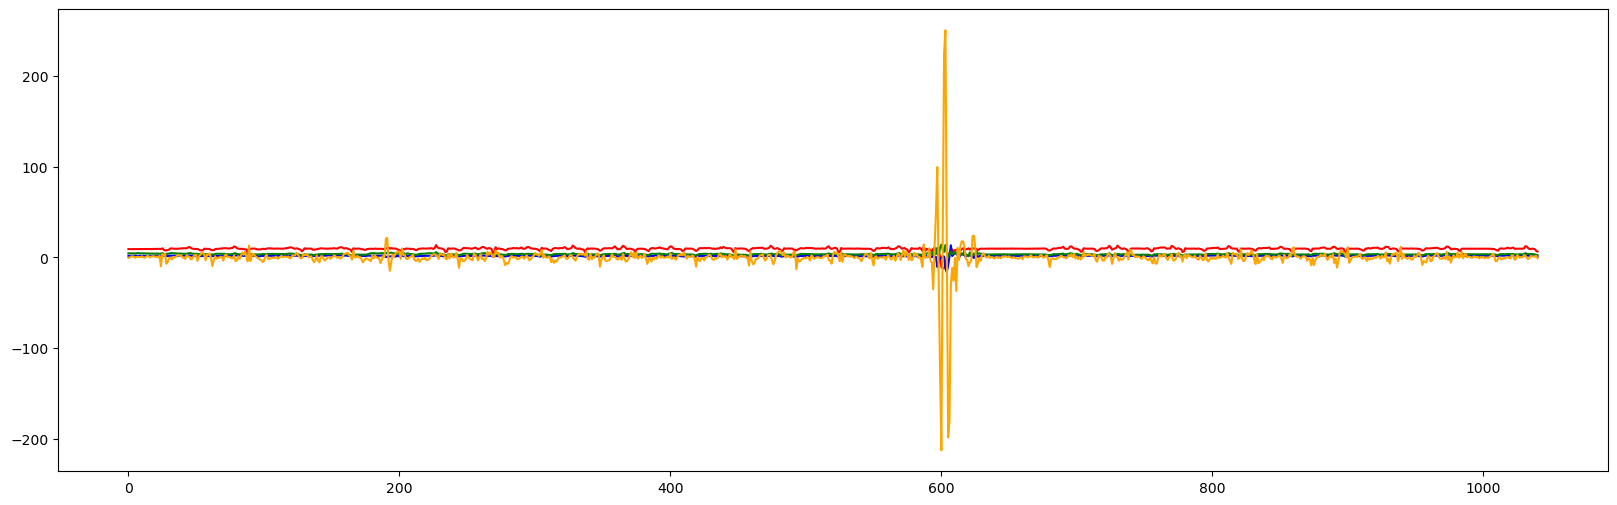

In [74]:
plt.figure(figsize=(20,6))
plt.plot(df['Ax'], color='red', label='Ax')
plt.plot(df['Ay'], color='blue', label='Ay')
plt.plot(df['Az'], color='green', label='Az')
plt.plot(df['Gz'], color='orange', label='Gz')
plt.show()

## Preparazione datasets

In [75]:
# Select the columns containing the accelerometer and gyroscope data
X = df[['Ax', 'Ay', 'Az', 'Gx', 'Gy', 'Gz']]

# Select the column containing the labels (0 for non-squat, 1 for squat)
y = df['mov']

##Divido il campione in Train e Test
X_train, X_test , y_train , y_test = train_test_split(X, y, test_size=0.2, random_state=None)

df.head()

,Ax,Ay,Az,Gx,Gy,Gz,mov
0,9.1154,1.6861,4.4428,0.21,2.17,-0.63,0
1,9.0436,1.6693,4.3541,1.47,2.59,-0.28,0
2,9.0125,1.6837,4.3062,0.56,-2.17,0.98,0
3,9.0292,1.7364,4.3398,-3.36,-0.35,0.98,0
4,9.0891,1.6358,4.4547,3.78,-3.01,0.77,0


## Logistic Regression

In [76]:
log_reg = LogisticRegression(random_state=None, solver = 'lbfgs', max_iter=1000)
log_reg.fit(X_train, y_train)

# predict - Predict class labels for samples in X
y_pred = log_reg.predict(X_train)

# coef_ - Coefficient of the features in the decision function
log_reg.coef_

lr = pd.DataFrame(data =[X_train.columns, np.array(log_reg.coef_[0]).tolist()]).T
lr.rename(columns={0:'Reg',1:'Logistic'}, inplace=True)
lr.set_index('Reg', inplace=True)
lr.sort_values(by='Logistic', key=abs, ascending=False , inplace=True)
print(lr)
print('b0:',log_reg.intercept_[0])

     Logistic
Reg          
Az  -0.180448
Ax   0.112689
Ay  -0.008341
Gy   0.006912
Gz   0.004228
Gx  -0.000994
b0: -0.44560571199922044


Logistic Reg Training Accuracy is:  0.4963942307692308
Logistic Reg Testing Accuracy is:  0.49282296650717705


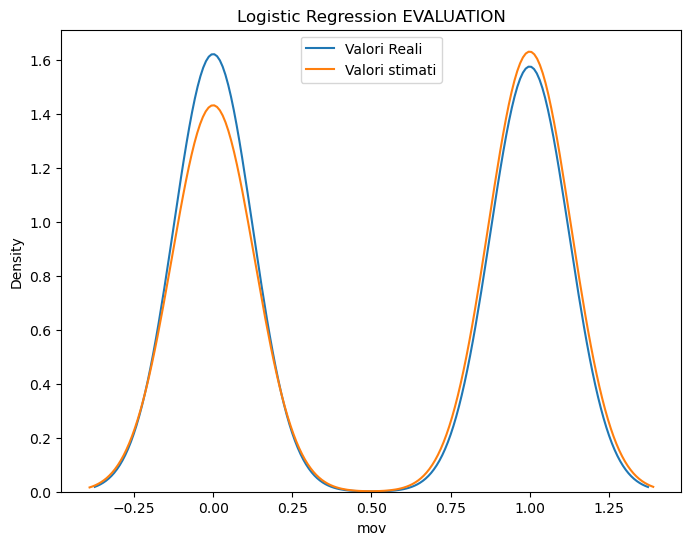

In [77]:
'''Logistic Regression EVALUATION'''

# Accuracy on Train
print("Logistic Reg Training Accuracy is: ", log_reg.score(X_train, y_train))
# Accuracy on Test
print("Logistic Reg Testing Accuracy is: ", log_reg.score(X_test, y_test))
# Classification Report

plt.figure(figsize=(8, 6))
plt.title('Logistic Regression EVALUATION')
sns.kdeplot(data=df, x='mov' , label='Valori Reali')
sns.kdeplot(y_pred , label='Valori stimati')
plt.legend()
plt.show()


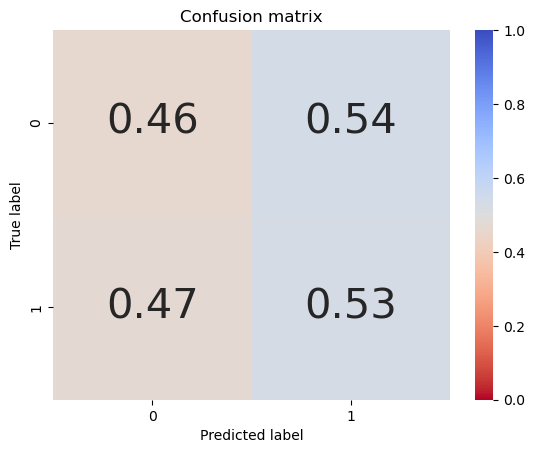

In [78]:
def plot_confusion_matrix(cm, classes=None, title='Confusion matrix'):
    """Plots a confusion matrix."""
    if classes is not None:
        sns.heatmap(cm, cmap="coolwarm_r", 
                    xticklabels=classes, 
                    yticklabels=classes, 
                    vmin=0., vmax=1., 
                    annot=True, annot_kws={'size':30}
                    )
    else:
        sns.heatmap(cm, vmin=0., vmax=1.)
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Visualizing CONFUSION MATRIX cm

cm = confusion_matrix(y_train, y_pred)
cm_norm = cm / cm.sum(axis=1).reshape(-1,1)

plot_confusion_matrix(cm_norm, classes = log_reg.classes_, title='Confusion matrix')

In [79]:
# Calculating False Positives (FP), False Negatives (FN), True Positives (TP) & True Negatives (TN)
FP = cm.sum(axis=0) - np.diag(cm)
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP)

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP / (TP + FN)
print("The True Positive Rate is:", TPR)

# Precision or positive predictive value
PPV = TP / (TP + FP)
print("The Precision is:", PPV)

# False positive rate or False alarm rate
FPR = FP / (FP + TN)
print("The False positive rate is:", FPR)


# False negative rate or Miss Rate
FNR = FN / (FN + TP)
print("The False Negative Rate is: ", FNR)

The True Positive Rate is: [0.46445498 0.52926829]
The Precision is: [0.50385604 0.48984199]
The False positive rate is: [0.47073171 0.53554502]
The False Negative Rate is:  [0.53554502 0.47073171]


In [80]:
# Running Log loss on training
pred_proba_train = log_reg.predict_proba(X_train)
print("The Log Loss on Training is: ", log_loss(y_train, pred_proba_train))

# Running Log loss on testing
pred_proba_test = log_reg.predict_proba(X_test)
print("The Log Loss on Test is: ", log_loss(y_test, pred_proba_test))

The Log Loss on Training is:  0.6868483388759186
The Log Loss on Test is:  0.7031728856336232


In [81]:
# Looping over the parameters
hyper_size = 20

C_List = np.geomspace(1e-5, 1e5, num=hyper_size)
CA = [] #classification accuracy
Logarithmic_Loss = [] #log ross

for c in C_List:
    log_reg2 = LogisticRegression(random_state=10, solver = 'lbfgs', C=c)
    log_reg2.fit(X_train, y_train)
    score = log_reg2.score(X_test, y_test)
    CA.append(score)
    # print("The CA of C parameter {} is {}:".format(c, score))
    pred_proba_test = log_reg2.predict_proba(X_test)
    log_loss2 = log_loss(y_test, pred_proba_test)
    Logarithmic_Loss.append(log_loss2)
    # print("The Logg Loss of C parameter {} is {}:".format(c, log_loss2))
    # print("")
    
#putting the outcomes in a Table

# reshaping
CA2 = np.array(CA).reshape(hyper_size,)
Logarithmic_Loss2 = np.array(Logarithmic_Loss).reshape(hyper_size,)

# zip
outcomes = zip(C_List, CA2, Logarithmic_Loss2)

#df
df_outcomes = pd.DataFrame(outcomes, columns = ["C_List", 'CA2','Logarithmic_Loss2'])

#print
df_outcomes

# Ordering the data (sort_values)
df_outcomes.sort_values("Logarithmic_Loss2", ascending = True).reset_index()

,index,C_List,CA2,Logarithmic_Loss2
0,0,0.000010,0.478469,0.697359
1,1,0.000034,0.497608,0.700878
2,7,0.048329,0.492823,0.703043
3,8,0.162378,0.502392,0.703104
4,6,0.014384,0.497608,0.703145
5,9,0.545559,0.492823,0.703160
6,11,6.158482,0.492823,0.703169
7,10,1.832981,0.492823,0.703175
8,12,20.691381,0.492823,0.703177
9,13,69.519280,0.492823,0.703180


In [82]:
# Another way of doing the above
# Scikit-learn offers a LogisticRegressionCV module which implements Logistic Regression 
# with builtin cross-validation to find out the optimal C parameter
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import KFold

kf = KFold(n_splits=10, random_state=None, shuffle=True)

Log_reg4 = LogisticRegressionCV(random_state=5, Cs = C_List, solver ='lbfgs', cv=kf)
Log_reg4.fit(X_train, y_train)
print("The CA is:", Log_reg4.score(X_test, y_test))
pred_proba_t = Log_reg4.predict_proba(X_test)
log_loss4 = log_loss(y_test, pred_proba_t)
print("The Logistic Loss is: ", log_loss4)
print("The optimal C parameter is: ", Log_reg4.C_)

The CA is: 0.5023923444976076
The Logistic Loss is:  0.7030422337961395
The optimal C parameter is:  [0.16237767]
